In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.externals import joblib

import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

/Users/humayun_gazi/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
Using TensorFlow backend.


In [4]:
#Loading the Dataset
dataset = pd.read_csv("diet.csv")

#Dropping features with nul values
dataset = dataset.drop(['SEQN','DRQSDT1', 'DRQSDT2', 'DRQSDT3','DRQSDT4','DRQSDT5','DRQSDT6',
      'DRQSDT7','DRQSDT8','DRQSDT9','DRQSDT10','DRQSDT11','DRQSDT12',
       'DRQSDT91','DRD370TQ', 'DRD370UQ','DRD370SQ','DRD370RQ','DRD370QQ',
       'DR1SKY','DR1TATOA','DR1TB12A','DR1TTHEO','DR1TALCO','DR1TP184',
       'DR1.320Z','DR1.330Z','DR1BWATZ','DRD350A','DRD350AQ','DRD350B',
       'DRD350BQ','DRD350F','DRD350FQ','DRD350G','DRD350GQ','DRD350H',
       'DRD350HQ','DRD350I','DRD350IQ','DRD350J','DRD350JQ','DRD350K',
       'DRD370A','DRD370AQ','DRD370B','DRD370BQ','DRD370C','DRD370CQ',
       'DRD370D','DRD370DQ','DRD370E','DRD370EQ','DRD370F','DRD370FQ',
       'DRD370G','DRD370GQ','DRD370H','DRD370HQ','DRD370I','DRD370IQ',
       'DRD370J','DRD370JQ','DRD370K','DRD370JQ','DRD370L','DRD370LQ',
       'DRD370M','DRD370MQ','DRD370N','DRD370NQ','DRD370O','DRD370OQ',
       'DRD370P','DRD370PQ','DRD370Q','DRD370R','DRD370S','DRD370T',
       'DRD370U','DRD370V','DRD370KQ','DRD350EQ','DRD350E','DRD350DQ',
       'DRD350D','DRD350CQ','DRD350C','DBD100','DRD340','DRD360','WTDR2D'], axis = 1)

In [5]:
#Cleaning the data
dataset.sort_values(by ='WTDRD1', ascending=True, inplace=True)
dataset.reset_index(drop=True, inplace=True)
dataset.drop(dataset.index[0:1152], inplace=True)
dataset.reset_index(drop=True, inplace=True)
dataset.interpolate(method='linear', limit_direction='both', axis = 1, inplace=True)
dataset.sample(frac=1)
#dataset.reset_index(drop=True, inplace=True)

,WTDRD1,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,...,DR1TM201,DR1TM221,DR1TP182,DR1TP183,DR1TP204,DR1TP205,DR1TP225,DR1TP226,DR1.300,DR1TWS
4773,26232.160529,1.0,49.0,2.0,2.0,1.0,4.0,1.0,1.0,13.0,...,0.068,0.000,3.690,0.426,0.081,0.004,0.009,0.006,2.0,4.0
1996,11327.892793,1.0,2.0,2.0,2.0,42.0,1.0,1.0,1.0,13.0,...,0.176,0.006,27.273,2.538,0.060,0.079,0.010,0.082,3.0,1.0
910,7431.368675,1.0,61.0,2.0,2.0,17.0,7.0,1.0,1.0,2.0,...,0.480,0.081,20.011,2.063,0.178,0.024,0.034,0.017,2.0,4.0
7449,66416.531161,1.0,49.0,2.0,2.0,22.0,6.0,1.0,1.0,13.0,...,1.196,0.109,20.198,2.581,0.125,0.418,0.122,0.760,1.0,4.0
7464,66832.623935,1.0,2.0,2.0,1.0,2.0,7.0,1.0,1.0,13.0,...,0.243,0.005,14.982,1.803,0.096,0.006,0.015,0.007,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5437,33049.660210,1.0,54.0,2.0,2.0,12.0,7.0,1.0,2.0,13.0,...,0.214,0.005,11.154,1.356,0.175,0.005,0.015,0.041,3.0,1.0
6640,48502.595026,1.0,2.0,2.0,2.0,8.0,6.0,1.0,1.0,13.0,...,0.154,0.000,14.354,1.602,0.367,0.014,0.039,0.068,2.0,1.0
7906,86629.795814,1.0,14.0,2.0,1.0,7.0,3.0,1.0,1.0,13.0,...,0.212,0.010,18.203,2.018,0.165,0.000,0.009,0.038,3.0,1.0
7448,66401.680886,1.0,14.0,2.0,2.0,10.0,4.0,1.0,1.0,13.0,...,0.120,0.006,8.652,1.220,0.015,0.001,0.000,0.001,3.0,1.0


In [6]:
#Checking missing data
missing_data = dataset.isnull().sum()

In [7]:
#Scalling the Dataset
normalized_df=(dataset-dataset.min())/(dataset.max()-dataset.min())
print(normalized_df)

            WTDRD1  DR1DRSTZ  DR1EXMER  DRABF  DRDINT   DR1DBIH    DR1DAY  \
0     0.000000e+00       0.0  0.258427    1.0     1.0  0.333333  0.833333   
1     5.973840e-07       0.0  0.584270    1.0     1.0  0.495238  1.000000   
2     5.973840e-07       0.0  0.584270    1.0     1.0  0.400000  1.000000   
3     5.653201e-04       1.0  0.662921    0.0     1.0  0.790476  1.000000   
4     5.653201e-04       1.0  0.134831    0.0     1.0  0.790476  1.000000   
...            ...       ...       ...    ...     ...       ...       ...   
8656  9.217784e-01       0.0  0.258427    1.0     0.0  0.409524  0.166667   
8657  9.366439e-01       0.0  0.000000    1.0     1.0  0.561905  0.500000   
8658  9.628122e-01       0.0  0.000000    1.0     1.0  0.476190  0.666667   
8659  9.895710e-01       0.0  0.662921    1.0     1.0  0.523810  0.666667   
8660  1.000000e+00       0.0  0.662921    1.0     1.0  0.657143  0.666667   

      DR1LANG  DR1MNRSP  DR1HELPD  ...  DR1TM201  DR1TM221  DR1TP182  \
0  

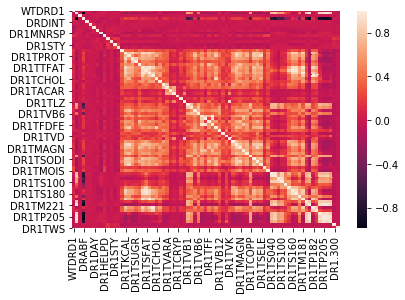

In [8]:
plot1 = plt.figure(1)
corr = normalized_df.corr()
heatmap = sns.heatmap(corr)
plt.savefig('heatmap.png', dpi=400)

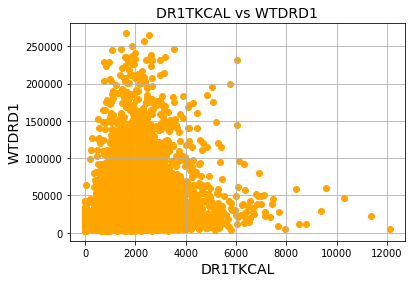

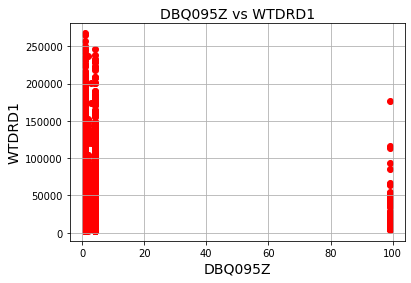

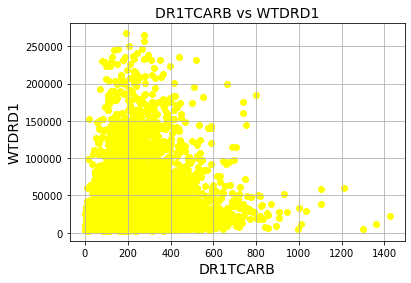

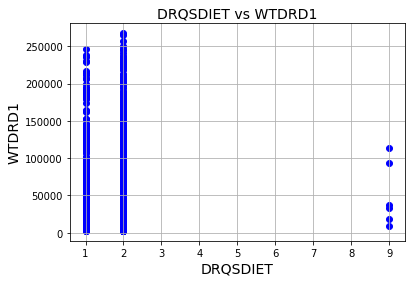

In [9]:
#Looking at the lINEAR realtionships between x and y
plot2 = plt.figure(2)
plt.scatter(dataset['DR1TKCAL'], dataset['WTDRD1'], color='orange')
plt.title('DR1TKCAL vs WTDRD1', fontsize=14)
plt.xlabel('DR1TKCAL', fontsize=14)
plt.ylabel('WTDRD1', fontsize=14)
plt.grid(True)
plt.show()

plot3 = plt.figure(3)
plt.scatter(dataset['DBQ095Z'], dataset['WTDRD1'], color='red')
plt.title('DBQ095Z vs WTDRD1', fontsize=14)
plt.xlabel('DBQ095Z', fontsize=14)
plt.ylabel('WTDRD1', fontsize=14)
plt.grid(True)
plt.show()

plot4 = plt.figure(4)
plt.scatter(dataset['DR1TCARB'], dataset['WTDRD1'], color='yellow')
plt.title('DR1TCARB vs WTDRD1', fontsize=14)
plt.xlabel('DR1TCARB', fontsize=14)
plt.ylabel('WTDRD1', fontsize=14)
plt.grid(True)
plt.show()

plot5 = plt.figure(5)
plt.scatter(dataset['DRQSDIET'], dataset['WTDRD1'], color='blue')
plt.title('DRQSDIET vs WTDRD1', fontsize=14)
plt.xlabel('DRQSDIET', fontsize=14)
plt.ylabel('WTDRD1', fontsize=14)
plt.grid(True)
plt.show()


In [10]:
#Setting Independant and Dependant variables
X = normalized_df.drop(['WTDRD1'], axis=1)
y = np.ravel(normalized_df[['WTDRD1']])

In [11]:
#Splitting of Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6928, 76) (6928,)
(1733, 76) (1733,)


In [12]:
#Random Forrest Regression
model_rf = RandomForestRegressor(n_estimators=10, random_state=0)
model_rf.fit(X_train, y_train)

#model_rf.show(view='Tree', tree_id=0)
RF_predictions = model_rf.predict(X_test)
print("Random Forest Predictions:\n%s" % model_rf.predict(X_test))
#print("Random Forest Results:\n%s" % model_rf.evaluate(X_test))
print("Random Forest Score:\n%s" % model_rf.score(X_train, y_train))

#RMSE of RF Model
rms4 = np.sqrt(mean_squared_error(y_test, RF_predictions))
print('RF_RMSE: \n', rms4)

#R2 Score
rf_r_squared = r2_score(y_test, RF_predictions)
print("RF R-Squared Score:\n%s" % rf_r_squared)

#Saving the RF Model
joblib.dump(model_rf,'Random_Forest_model')

Random Forest Predictions:
[0.08654547 0.02634605 0.10205027 ... 0.08471187 0.21750698 0.02582507]
Random Forest Score:
0.8601242170009731
RF_RMSE: 
 0.1221542300148471
RF R-Squared Score:
0.2831161096212702


['Random_Forest_model']

In [13]:
#Loading the RF Model
New_RF_Model = joblib.load('Random_Forest_model')
New_RF_Model.predict(X_test)

array([0.08654547, 0.02634605, 0.10205027, ..., 0.08471187, 0.21750698,
       0.02582507])

In [14]:
#Making our Prediction using Linear Regression
regr_ols = linear_model.LinearRegression()
regr_sgd = linear_model.SGDRegressor(max_iter=1000, power_t = 0.01, eta0 = 0.01, tol = 1e-3)
MLP_regr = MLPRegressor(max_iter=10000,
                             hidden_layer_sizes=(100,), 
                             activation='relu',
                             solver='adam',)

In [15]:
#Fitting the model
model_lr_ols = regr_ols.fit(X_train, y_train)
model_lr_sgd = regr_sgd.fit(X_train, y_train)
MLP_lr = MLP_regr.fit(X_train, y_train)

#Predicting the test set results
predictions_ols = regr_ols.predict(X_test)
predictions_sgd = regr_sgd.predict(X_test)
MLP_predictions = MLP_lr.predict(X_test)

print('Linear Regression Predictions_ols: \n', predictions_ols)
print('Linear Regression Predictions_sgd: \n', predictions_sgd)
print('Linear Regression Predictions with MLP: \n', MLP_predictions)

print('Intercept_ols: \n', regr_ols.intercept_)
print('Intercept_sgd: \n', regr_sgd.intercept_)

print('Coefficients_ols: \n', regr_ols.coef_)
print('Coefficients_sgd: \n', regr_sgd.coef_)

modlist = [model_lr_ols, model_lr_sgd, MLP_lr]

Linear Regression Predictions_ols: 
 [0.10669294 0.04918228 0.09702403 ... 0.13839963 0.17549176 0.04246337]
Linear Regression Predictions_sgd: 
 [0.09215951 0.05847325 0.10815577 ... 0.09887971 0.13946744 0.03544635]
Linear Regression Predictions with MLP: 
 [0.11587577 0.08660971 0.17813481 ... 0.19106237 0.28058998 0.06008409]
Intercept_ols: 
 0.0777619882721946
Intercept_sgd: 
 [0.05476778]
Coefficients_ols: 
 [ 6.55842166e-02 -1.44818348e-02  3.97517867e-02  2.02668167e-03
  2.08647534e-02 -7.38536693e-02 -9.72852708e-02 -3.47323324e-01
  2.12040672e-01 -6.59419532e-03 -2.78031139e-02 -2.42790930e-02
  3.37239875e-02  5.81563449e-02  5.64431304e-01  1.23343303e-01
 -6.23808416e-01  1.98854641e-01  8.16392441e-02  7.72683308e-01
  2.79578303e-01 -2.04334134e-01  2.63492905e+00 -6.22196910e-02
  1.99193237e-01  9.63615006e+00 -9.38512525e+00  1.38215820e+00
  5.73599507e+00  7.64884391e-01 -1.16213371e-02  3.53890904e-02
  5.63409260e-02  1.75616932e-01 -2.16100128e-01  1.89288482e-

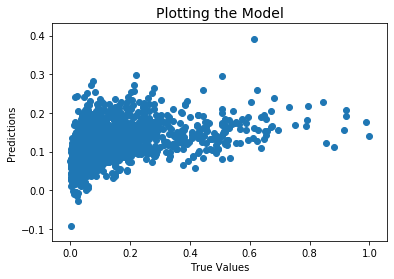

In [16]:
#Plotting the Linear Regression Model
plot6 = plt.figure(6)
plt.scatter(y_test, predictions_sgd)
plt.title('Plotting the Model', fontsize=14)
plt.xlabel('True Values', fontsize=10)
plt.ylabel('Predictions', fontsize=10)
plt.savefig('Model_Plot.png', dpi=400)

In [17]:
#RMSE Values of Linear Regression Models
rms = np.sqrt(mean_squared_error(y_test, predictions_ols))
print('RMSE_ols: \n', rms)
rms2 = np.sqrt(mean_squared_error(y_test, predictions_sgd))
print('RMSE_sgd: \n', rms2)
rms3 = np.sqrt(mean_squared_error(y_test, MLP_predictions))
print('MLP_RMSE: \n', rms3)

RMSE_ols: 
 0.13243565483282868
RMSE_sgd: 
 0.131864925212997
MLP_RMSE: 
 0.13087869074372369


In [18]:
#R Squared Score of Linear Regression
r_squared = r2_score(y_test, predictions_ols)
print("OLS R Squared Score:\n%s" % r_squared)
r_squared_2 = r2_score(y_test, predictions_sgd)
print("SGD R Squared Score:\n%s" % r_squared)
r_squared_3 = r2_score(y_test, MLP_predictions)
print("MLP R Squared Score:\n%s" % r_squared_3)

OLS R Squared Score:
0.1573608237365346
SGD R Squared Score:
0.1573608237365346
MLP R Squared Score:
0.17705713579445492


In [19]:
#Cross Validation
print("Cross_Val_Predictions_OLS:\n%s" % cross_val_predict(regr_ols, X, y, cv=5))
print("Cross_Val_Predictions_SGD:\n%s" % cross_val_predict(regr_sgd, X, y, cv=5))
print("Cross_Val_Predictions_MLP:\n%s" % cross_val_predict(MLP_regr, X, y, cv=5))

print("Cross_Val_score_OLS:\n%s" % cross_val_score(regr_ols, X, y, cv = 5))
print("Cross_Val_score_SGD:\n%s" % cross_val_score(regr_sgd, X, y, cv = 5))
print("Cross_Val_score_SGD:\n%s" % cross_val_score(MLP_regr, X, y, cv = 5))

Cross_Val_Predictions_OLS:
[0.05782843 0.04615695 0.06818169 ... 0.08075353 0.09097614 0.08433911]
Cross_Val_Predictions_SGD:
[0.13173428 0.08950606 0.11876917 ... 0.09144334 0.10012749 0.09245184]
Cross_Val_Predictions_MLP:
[ 0.01862318  0.00548231 -0.0057331  ...  0.11766348  0.10685715
  0.10498868]
Cross_Val_score_OLS:
[-182.25896032 -176.7515966   -45.41218268   -5.33257697   -2.86609589]
Cross_Val_score_SGD:
[-133.88926558  -96.8981887   -47.6224267    -5.08503232   -3.04816712]
Cross_Val_score_SGD:
[-110.4767978  -130.73775344  -55.42595258  -11.30717825   -2.78682182]


In [20]:
#Saving the Scikit-Learn Models
joblib.dump(modlist, 'Scikit-Learn_models')

['Scikit-Learn_models']

In [21]:
modlist_loaded = joblib.load('Scikit-Learn_models')

model_1 = modlist_loaded[0]
model_2 = modlist_loaded[1]
model_3 = modlist_loaded[2]

print(model_1.predict(X_test))
print(model_2.predict(X_test))
print(model_3.predict(X_test))

[0.10669294 0.04918228 0.09702403 ... 0.13839963 0.17549176 0.04246337]
[0.09215951 0.05847325 0.10815577 ... 0.09887971 0.13946744 0.03544635]
[0.11587577 0.08660971 0.17813481 ... 0.19106237 0.28058998 0.06008409]


In [22]:
#Keras Regression Model
keras_model = Sequential([
    Dense(77, input_shape=(76,), activation='relu'),
    Dense(39, activation='relu'),
    Dense(1, activation=None)
])

In [23]:
keras_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 77)                5929      
_________________________________________________________________
dense_2 (Dense)              (None, 39)                3042      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 40        
Total params: 9,011
Trainable params: 9,011
Non-trainable params: 0
_________________________________________________________________


In [24]:
keras_model.compile(Adam(lr=0.0001), loss='mse', metrics=['mse'])

In [25]:
history = keras_model.fit(X_train, y_train, epochs=150, batch_size=100, verbose=1, validation_split=0.1, shuffle=True)

Train on 6235 samples, validate on 693 samples
Epoch 1/150
6235/6235 [==============================] - 1s 88us/step - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 2/150
6235/6235 [==============================] - 0s 22us/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 3/150
6235/6235 [==============================] - 0s 22us/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 4/150
6235/6235 [==============================] - 0s 21us/step - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 5/150
6235/6235 [==============================] - 0s 22us/step - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 6/150
6235/6235 [==============================] - 0s 21us/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 7/150
6235/6235 [==============================] - 0s 26us/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0147 - val_mse: 0.0147
E

6235/6235 [==============================] - 0s 25us/step - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0135 - val_mse: 0.0135
Epoch 61/150
6235/6235 [==============================] - 0s 23us/step - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 62/150
6235/6235 [==============================] - 0s 23us/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 63/150
6235/6235 [==============================] - 0s 24us/step - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 64/150
6235/6235 [==============================] - 0s 21us/step - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 65/150
6235/6235 [==============================] - 0s 20us/step - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 66/150
6235/6235 [==============================] - 0s 20us/step - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 67/150
6235/6235 [==============================

Epoch 120/150
6235/6235 [==============================] - 0s 21us/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 121/150
6235/6235 [==============================] - 0s 21us/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 122/150
6235/6235 [==============================] - 0s 21us/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 123/150
6235/6235 [==============================] - 0s 21us/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 124/150
6235/6235 [==============================] - 0s 21us/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 125/150
6235/6235 [==============================] - 0s 21us/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 126/150
6235/6235 [==============================] - 0s 20us/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 127/150
6235/6235 [=========

dict_keys(['val_loss', 'val_mse', 'loss', 'mse'])


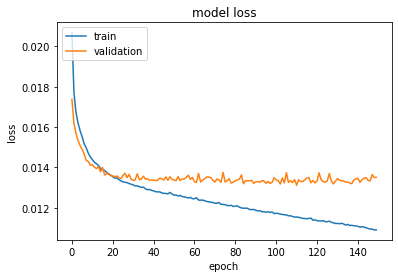

In [26]:
print(history.history.keys())
# "Loss"
plot7 = plt.figure(7)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('Loss.png', dpi=400)

In [27]:
Keras_Predictions = keras_model.predict(X_test, batch_size = 100, verbose=0)

In [28]:
for i in Keras_Predictions:
    print (i)

[0.06490622]
[0.04019479]
[0.0501691]
[0.06776728]
[0.03928645]
[0.09721691]
[0.03903463]
[0.02785471]
[0.10232124]
[0.02209049]
[0.20558329]
[0.0824521]
[0.1625395]
[0.12675822]
[0.26603758]
[0.09663111]
[0.14873265]
[0.04344652]
[0.13723163]
[0.03128082]
[0.20669155]
[0.1556394]
[0.06982435]
[0.22218385]
[0.10564779]
[0.14670987]
[0.10595314]
[0.06349593]
[0.10111156]
[0.11153406]
[0.13550766]
[-0.03766726]
[0.02914918]
[0.20121871]
[0.08707926]
[0.09581597]
[0.14002651]
[0.05705059]
[0.05916419]
[0.10703369]
[0.15835813]
[0.31279173]
[0.12382462]
[0.06781533]
[0.00859683]
[0.12519574]
[0.07028443]
[0.04254398]
[0.05996109]
[0.04748932]
[0.15125984]
[0.08993243]
[0.08173215]
[0.06877188]
[0.09745806]
[0.16778888]
[0.10939327]
[0.14418867]
[0.03310503]
[-0.01162379]
[0.03087389]
[0.11214063]
[0.12066337]
[0.14889722]
[0.07031486]
[0.144738]
[0.03691192]
[0.14843577]
[0.05897367]
[0.06169492]
[0.13022742]
[0.14152965]
[0.06596103]
[0.10396839]
[0.11404669]
[0.13387111]
[0.19595216]
[0.

[0.0660938]
[0.00947016]
[0.00353647]
[0.24614616]
[0.03547706]
[0.2009298]
[0.14353184]
[0.13066527]
[0.13008332]
[0.18388368]
[0.04931485]
[0.02185153]
[0.3231074]
[0.19743034]
[0.07497037]
[0.18806139]
[0.3366395]
[0.04667104]
[0.0387654]
[0.01745839]
[0.27423224]
[0.09236516]
[0.05336171]
[0.25177005]
[0.01602936]
[0.15420356]
[0.02125258]
[0.04402374]
[0.01806438]
[0.04526754]
[0.01754345]
[0.02625536]
[0.1579973]
[0.05971366]
[0.03790658]
[0.0486364]
[0.04839905]
[0.24228229]
[0.14403294]
[0.26250383]
[0.02058024]
[0.0402057]
[0.3955224]
[0.14375858]
[0.00956346]
[0.1689861]
[0.04632102]
[0.07276212]
[0.08982873]
[0.11675472]
[0.058101]
[0.26316842]
[0.1296106]
[0.1211164]
[0.16643305]
[0.08761527]
[0.18225053]
[0.05891588]
[0.0513794]
[0.05132155]
[0.23940085]
[0.0974879]
[0.10969938]
[0.02284336]
[0.14036305]
[0.33199862]
[0.13765468]
[0.11609004]
[0.14764088]
[0.17383644]
[0.25581747]
[0.0373374]
[0.1670905]
[0.05721014]
[0.07935942]
[0.12154721]
[0.04545783]
[0.04444515]
[0.1

In [29]:
#Keras R-Squared Score
r_squared_4 = r2_score(y_test, Keras_Predictions)
print(r_squared_4)

0.29690700870357223


In [30]:
#Keras RMSE
rms5 = np.sqrt(mean_squared_error(y_test, Keras_Predictions))
print('Keras_RMSE: \n', rms5)


Keras_RMSE: 
 0.12097356643575592


In [31]:
#Saving the model
keras_model.save("keras_model.h5")
print("Saved model to disk")

Saved model to disk


In [32]:
from keras.models import load_model
new_keras_model = load_model("keras_model.h5")

In [33]:
new_keras_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 77)                5929      
_________________________________________________________________
dense_2 (Dense)              (None, 39)                3042      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 40        
Total params: 9,011
Trainable params: 9,011
Non-trainable params: 0
_________________________________________________________________


In [34]:
#Generating Keras Model Weights
new_keras_model.get_weights()

[array([[-0.07326215, -0.00833145, -0.1663541 , ..., -0.0875677 ,
         -0.14980039, -0.10313556],
        [-0.07877036, -0.00621466, -0.0527031 , ..., -0.02489216,
         -0.11394344,  0.10928912],
        [ 0.18091047,  0.0184107 ,  0.07496958, ..., -0.14720127,
          0.13648514,  0.16291636],
        ...,
        [ 0.19393674,  0.14218016, -0.15438955, ..., -0.08107839,
          0.02217868, -0.01920918],
        [-0.1798155 , -0.10971127,  0.18469399, ...,  0.03237284,
          0.01956991,  0.18467787],
        [ 0.14412475, -0.1311935 , -0.06614739, ..., -0.00455693,
         -0.13496633,  0.14679644]], dtype=float32),
 array([ 1.60383375e-03,  1.98801048e-02, -8.08176957e-03, -2.78399773e-02,
        -1.38659505e-02, -2.24827360e-02, -7.35221431e-03,  1.60916280e-02,
        -1.92444155e-03,  1.02266045e-02, -1.75463818e-02,  4.01050504e-03,
         2.84397099e-02,  2.32174937e-02,  1.72214806e-02, -8.76535010e-03,
         1.47756562e-02,  8.59950855e-03,  8.96639377e

In [35]:
 new_keras_model.optimizer